# Тематическое моделирование

В предыдущих сериях:

1) Сделали обычный процессинг - столбец `cleaned_text`
2) Сделали лемматизацию - `lemmatized_text`
3) По lemmatized_text сделали селекцию от 6 слов и больше


In [1]:
import numpy as np

# 1
import pandas as pd

import yaml
import pathlib
ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

DATA_PATH = ROOT / config['api']['DATA_PATH']

In [2]:
# 2

dataset = pd.read_csv(DATA_PATH / 'comment' / 'cm_dataset.csv')
dataset

,index,id,snippet.videoId,snippet.textDisplay,snippet.textOriginal,snippet.authorDisplayName,snippet.parentId,cleaned_text,lemmatized_text,Разметка даннных
0,27894,UgxhFoxSqx1yAYT7atp4AaABAg,Li9V9D0b_hM,Ксюша спасибо за ваш труд и за полезную информ...,Ксюша спасибо за ваш труд и за полезную информ...,Natalja Sk,-1,Ксюша спасибо за ваш труд и за полезную информ...,ксюша спасибо ваш труд полезный информация дум...,NaN
1,20820,UgwTTZmqC3dcnrL3f5B4AaABAg,HLNcjqIq7gs,Макияж сегодня особенно красивый;) пока пробов...,Макияж сегодня особенно красивый;) пока пробов...,Diana Suvorova,-1,Макияж сегодня особенно красивый;) пока пробов...,макияж сегодня особенно красивый пока пробоват...,NaN
2,10202,UgySgzy2iZMjLLcDxhh4AaABAg,j1IdDdQcJng,"Никогда не смотрела Лиссу, но сейчас уже 3 ден...","Никогда не смотрела Лиссу, но сейчас уже 3 ден...",Призрак,-1,"Никогда не смотрела Лиссу, но сейчас уже 3 ден...",смотреть лисс день смотреть уютный веселый видео,NaN
3,16470,UgwVuVcwFxZwVSPmC3Z4AaABAg,IkzWyECzlco,Руки Кёнха столько всего повидали за несколько...,Руки Кёнха столько всего повидали за несколько...,Zoro Roronoa,-1,Руки Кёнха столько всего повидали за несколько...,рука кенх столько повидать несколько минута,NaN
4,29970,Ugw029ioXJAgbOWrCA94AaABAg.9cwNxc_Z_4M9dM4AHOpjsE,Wi49rKRM85U,А ретиноид как вы используете? Всё хочу начать...,А ретиноид как вы используете? Всё хочу начать...,brainbrain,Ugw029ioXJAgbOWrCA94AaABAg,А ретиноид как вы используете? Всё хочу начать...,ретиноид использовать хотеть начинать знать по...,NaN
...,...,...,...,...,...,...,...,...,...,...
5447,41765,UgyNMcGbdzS3PJkhNp14AaABAg.9kO9yJDDrCh9kOOwLQ1tsf,boB2LEXG_zA,@mila ya я как то помыла мылом лицо месяца два...,@mila ya я как то помыла мылом лицо месяца два...,Марина Марина,NaN,ya я как то помыла мылом лицо месяца два.. не...,ya помыть мыло лицо месяц спец средство мягко ...,0.0
5448,41769,UgyNMcGbdzS3PJkhNp14AaABAg.9kO9yJDDrCh9kONm9pHXJ_,boB2LEXG_zA,"@Natali N во первых, я всю жизнь проработала в...","@Natali N во первых, я всю жизнь проработала в...",mila ya,NaN,"N во первых, я всю жизнь проработала в кабине...",n первый весь жизнь прорабатывать кабинет пыль...,2.0
5449,41771,UgyNMcGbdzS3PJkhNp14AaABAg.9kO9yJDDrCh9kOLqLSTzR5,boB2LEXG_zA,"@ЗаноZa , Да-да, продажная цена три копейки, а...","@ЗаноZa , Да-да, продажная цена три копейки, а...",Natali N,NaN,"@ЗаноZa , Да-да, продажная цена три копейки, а...",заноza продажный цена копейка закупочный минус...,2.0
5450,41777,UgyNMcGbdzS3PJkhNp14AaABAg.9kO9yJDDrCh9kOCWb6ImX5,boB2LEXG_zA,"А мне она не подходит , на лице скатывается . ...","А мне она не подходит , на лице скатывается . ...",черная мамба,NaN,"А мне она не подходит , на лице скатывается . ...",подходить лицо скатываться просто нивея мазюка...,0.0


In [3]:
#
cm_matrix = pd.read_excel(DATA_PATH / 'comment/cm_cmatrix.xlsx')
cm_matrix

,ксюша,спасибо,ваш,труд,полезный,информация,думать,отличный,идея,макияж,...,кремик,яна,духи,катюша,уничтожать,подозрительно,доплачивать,мошенник,палево,index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27894
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20820
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10202
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16470
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41765
5448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41769
5449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41771
5450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41777


In [4]:
cm_matrix = cm_matrix.astype(float)
cm_matrix['index'] = cm_matrix['index'].astype(int)

In [5]:
cm_matrix['target'] = dataset['Разметка даннных'].values

In [6]:
labels_names = {
    0 : "продукт",
    1 : "блогер",
    2 : "корейская косметика",
    3 : "подделки",
}

In [7]:

tagged = cm_matrix[cm_matrix['target'].isnull() == False]
untagged = cm_matrix[cm_matrix['target'].isnull()]


In [76]:
print('Разметка', tagged.shape)
print('Разметка', untagged.shape)

Разметка (627, 2373)
Разметка (4825, 2374)


In [8]:

tagged['target'] = tagged['target'].apply(lambda x: 1 if x == 2 else 0)

/var/folders/s5/4r_7wwf925g2bnv4060z0x400000gn/T/ipykernel_15250/3289262411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tagged['target'] = tagged['target'].apply(lambda x: 1 if x == 2 else 0)


In [9]:
tagged['target'].value_counts(normalize=True)

target
0    0.711324
1    0.288676
Name: proportion, dtype: float64

In [10]:
tagged.head()

,ксюша,спасибо,ваш,труд,полезный,информация,думать,отличный,идея,макияж,...,яна,духи,катюша,уничтожать,подозрительно,доплачивать,мошенник,палево,index,target
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27612,1
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22339,1
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26413,1
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7090,1
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27357,1


# Prepare_dataset

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    tagged,
    stratify=tagged['target'],
    random_state=42,
    test_size=0.15)

print('Размер', train.shape[0])
print('Размер', test.shape[0])

Размер 532
Размер 95


In [12]:
tokenS = list(tagged.columns)
tokenS.remove('index')
tokenS.remove('target')

In [34]:
train[tokenS].var().sort_values()

ксюша            0.000000
green            0.000000
innisfree        0.000000
умываться        0.000000
спасение         0.000000
                   ...   
зря              0.309021
разбор           0.384053
проф             0.510358
привозить        0.512227
исключительно    0.635639
Length: 2371, dtype: float64

In [35]:
tokenS_out = list(train[tokenS].var()[train[tokenS].var() == 0].index)
print('Tokens with zero variance', tokenS_out)

Tokens with zero variance ['ксюша', 'спасибо', 'труд', 'полезный', 'информация', 'думать', 'отличный', 'макияж', 'красивый', 'пока', 'пробовать', 'умывалка', 'понравиться', 'похожий', 'лисс', 'видео', 'рука', 'кенх', 'использовать', 'хотеть', 'начинать', 'помогать', 'пожалуйста', 'отбеливать', 'пять', 'слишком', 'ходить', 'большой', 'добрый', 'татьяна', 'волос', 'регулярно', 'удовольствие', 'список', 'средство', 'магазин', 'работа', 'пусть', 'следующий', 'полностью', 'писать', 'азиатский', 'отзыв', 'топ', 'ролик', 'вебер', 'выбирать', 'многое', 'совет', 'запрещать', 'мир', 'светлана', 'познавательный', 'урок', 'круто', 'подробно', 'объяснять', 'наш', 'огромный', 'знание', 'голос', 'применение', 'часто', 'пилинг', 'очередь', 'мягко', 'вроде', 'рф', 'видеть', 'мочь', 'ибей', 'должный', 'предполагать', 'происходить', 'лицо', 'увидеть', 'болеть', 'елена', 'стоять', 'корея', 'потребность', 'тип', 'относиться', 'сходить', 'косметолог', 'обычный', 'куча', 'нога', 'голова', 'дорого', 'расти', 

In [36]:
print(f'Проверка: дисперсия токена "{tokenS_out[0]}" равна', train[tokenS].var()[tokenS_out[0]])

Проверка: дисперсия токена "ксюша" равна 0.0


In [37]:
tokenS_in = list(train[tokenS].var()[train[tokenS].var() != 0].index)
print('Tokens with non-zero variance', tokenS_in)


Tokens with non-zero variance ['ваш', 'идея', 'сегодня', 'особенно', 'cosrx', 'далеко', 'смотреть', 'день', 'веселый', 'столько', 'несколько', 'минута', 'знать', 'свой', 'светлый', 'год', 'назад', 'больно', 'цвет', 'настоящий', 'обзор', 'выбор', 'косметика', 'интересно', 'вкусно', 'отдыхать', 'корейский', 'пользоваться', 'исключение', 'шампунь', 'тема', 'ждать', 'новый', 'ника', 'сменить', 'уход', 'снимать', 'отдельный', 'это', 'очень', 'долго', 'недавно', 'понимать', 'кожа', 'акна', 'подходить', 'уходовой', 'читать', 'состав', 'крем', 'помнить', 'речь', 'идти', 'посмотреть', 'обычно', 'делать', 'брать', 'нравиться', 'гормональный', 'существовать', 'весь', 'рассказывать', 'каждый', 'тинта', 'наноситься', 'внутренний', 'часть', 'губа', 'наносить', 'получаться', 'дорогой', 'амин', 'приятно', 'слышать', 'специалист', 'насчет', 'тонер', 'применять', 'хороший', 'качество', 'тоника', 'сыворотка', 'достаточно', 'продукт', 'тоник', 'находить', 'место', 'любить', 'энзимный', 'первый', 'дело', '

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_auc_curve(y_pred_proba, y_real, title):
    fpr, tpr, _ = metrics.roc_curve(y_real,  y_pred_proba)
    auc = metrics.roc_auc_score(y_real, y_pred_proba)


    #create ROC curve
    plt.plot(fpr,tpr, label="AUC: {:.5f}".format(auc))
    plt.title(title)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.axline((0, 0), color='red', slope=1)
    plt.legend(loc=4)
    plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

params = {'penalty':[None, 'l1', 'l2'],
              'C':[1, 10, 100, 1000],
              'solver': ['saga','newton-cg' ]
          }

logreg_cv = GridSearchCV(estimator=logreg,
                           param_grid=params,
                           scoring = 'precision',
                           cv = 5,
                           verbose=1)


logreg_cv.fit(train[tokenS_in], train['target'])

logreg = logreg_cv.best_estimator_
print("Best_params:", logreg_cv.best_params_)
print("Best_score:", abs(logreg_cv.best_score_))
print("Best_estimator:", logreg_cv.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Conver

Best_params: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best_score: 0.8124869383490074
Best_estimator: LogisticRegression(C=1, solver='saga')


/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


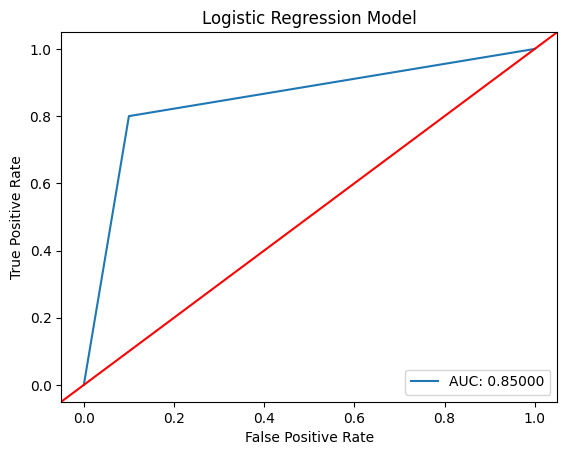

In [42]:

logreg_model = logreg_cv.best_estimator_

#define metrics
y_pred_proba_lr = logreg_model.predict_proba(test[tokenS_in])
y_pred_lr = logreg_model.predict(test[tokenS_in])

plot_roc_auc_curve(test['target'], y_pred_lr, "Logistic Regression Model")

In [45]:
coefs = pd.DataFrame(
    np.transpose(logreg_model.coef_),
    columns=["Coefficients"],
    index=tokenS_in,
)
display(coefs)

,Coefficients
ваш,-0.114494
идея,-0.216044
сегодня,0.012090
особенно,0.364406
cosrx,-0.006181
...,...
уничтожать,0.295285
подозрительно,0.289849
доплачивать,0.084972
мошенник,-0.044518


In [63]:
untagged_pred_proba = logreg_model.predict_proba(untagged[tokenS_in])[:,1]
untagged_pred = logreg_model.predict(untagged[tokenS_in])

In [64]:
untagged['proba_lr'] = untagged_pred_proba
untagged['target'] = untagged_pred

/var/folders/s5/4r_7wwf925g2bnv4060z0x400000gn/T/ipykernel_15250/3395660986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untagged['proba_lr'] = untagged_pred_proba
/var/folders/s5/4r_7wwf925g2bnv4060z0x400000gn/T/ipykernel_15250/3395660986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untagged['target'] = untagged_pred


In [72]:
#
labelled = untagged[['index','target', 'proba_lr']].copy(deep=True)

labelled.shape

(4825, 3)

In [73]:
labelled = labelled.merge(dataset,on='index', how='left' )
labelled.shape

(4825, 12)

In [75]:
labelled.to_excel(DATA_PATH / 'comment/check_prediction_lr.xlsx', index=False)

# Decision_tree

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42)

params = { "criterion": ['gini', 'entropy'],
        "max_depth": np.linspace(1, 10, num=5, dtype=int),
          "min_samples_split": np.linspace(start=5, stop=100, num=10, dtype=int)}

tree_cv = GridSearchCV(tree, params, cv=5, scoring='precision', refit=True)
tree_cv.fit(train[tokenS], train['target'])

tree_model = tree_cv.best_estimator_
print("Best_params:", tree_cv.best_params_)
print("Best_score:", abs(tree_cv.best_score_))
print("Best_estimator:", tree_cv.best_estimator_)

[Text(0.75, 0.9545454545454546, 'привозить <= 0.5\ngini = 0.411\nsamples = 532\nvalue = [378, 154]'),
 Text(0.625, 0.8636363636363636, 'ура <= 1.5\ngini = 0.174\nsamples = 354\nvalue = [320, 34]'),
 Text(0.5625, 0.7727272727272727, 'мелкий <= 0.5\ngini = 0.153\nsamples = 348\nvalue = [319, 29]'),
 Text(0.5, 0.6818181818181818, 'видимо <= 0.5\ngini = 0.139\nsamples = 345\nvalue = [319, 26]'),
 Text(0.4375, 0.5909090909090909, 'оригинальный <= 0.5\ngini = 0.125\nsamples = 342\nvalue = [319, 23]'),
 Text(0.375, 0.5, 'acid <= 0.5\ngini = 0.111\nsamples = 338\nvalue = [318, 20]'),
 Text(0.3125, 0.4090909090909091, 'some <= 0.5\ngini = 0.101\nsamples = 336\nvalue = [318, 18]'),
 Text(0.25, 0.3181818181818182, 'достаточный <= 0.5\ngini = 0.087\nsamples = 330\nvalue = [315, 15]'),
 Text(0.1875, 0.22727272727272727, 'набор <= 0.5\ngini = 0.076\nsamples = 327\nvalue = [314, 13]'),
 Text(0.125, 0.13636363636363635, 'отдушка <= 0.5\ngini = 0.071\nsamples = 326\nvalue = [314, 12]'),
 Text(0.0625, 0

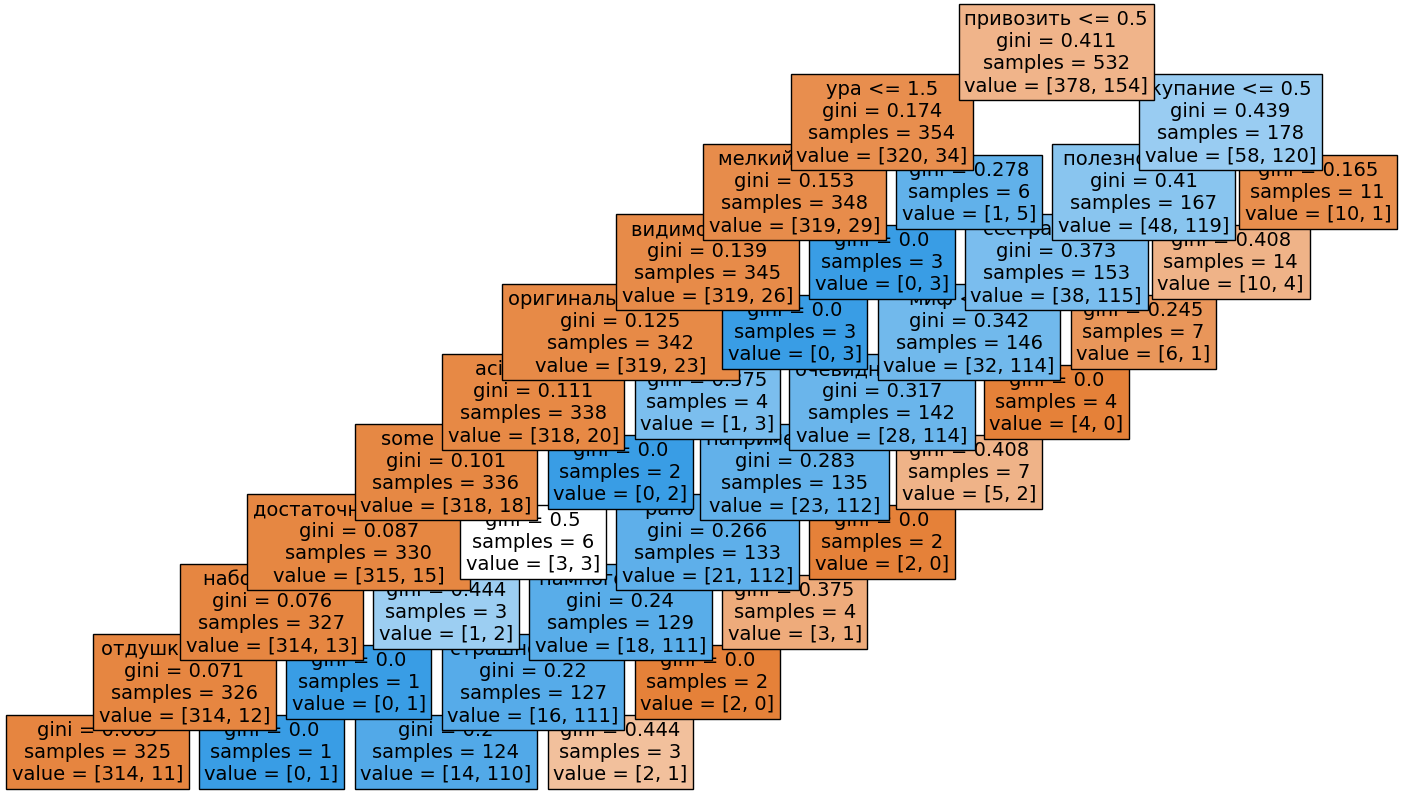

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))

plot_tree(tree_model, feature_names=tokenS, filled=True, fontsize=14)

In [ ]:
# Разметка другого датасета